<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Waiter-tips/waiter_tips_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tips.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [4]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [5]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [6]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [7]:
figure = px.pie(data,
             values='tip',
             names='day',hole = 0.5)
figure.show()

In [8]:
figure = px.pie(data,
             values='tip',
             names='sex',hole = 0.5)
figure.show()

In [9]:
figure = px.pie(data,
             values='tip',
             names='smoker',hole = 0.5)
figure.show()

In [10]:
figure = px.pie(data,
             values='tip',
             names='time',hole = 0.5)
figure.show()

In [11]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [12]:
x = np.array(data[["total_bill", "sex", "smoker", "day",
                   "time", "size"]])
y = np.array(data["tip"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.25,
                                                random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [14]:
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([3.69602839])

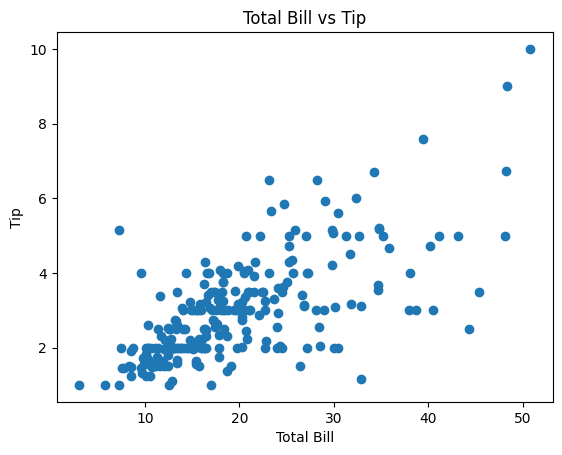

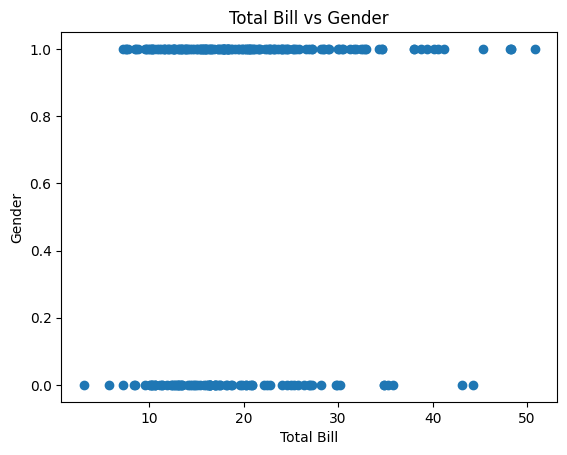

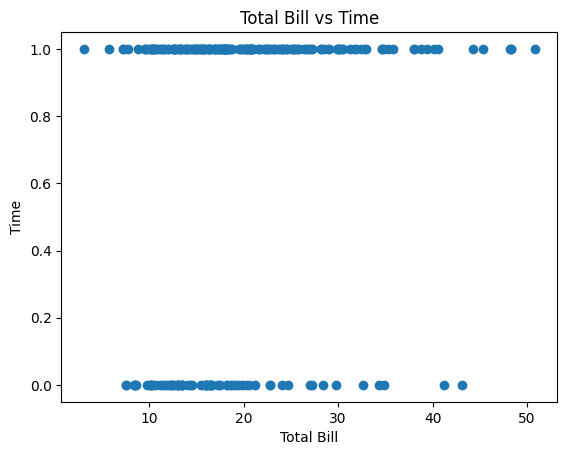

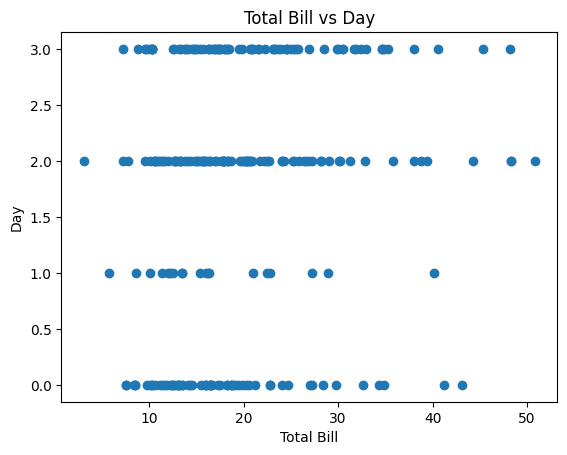

In [20]:
import matplotlib.pyplot as plt

# Total Bill vs Tip
plt.scatter(data['total_bill'], data['tip'])
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

# Total Bill vs Gender
plt.scatter(data['total_bill'], data['sex'])
plt.title('Total Bill vs Gender')
plt.xlabel('Total Bill')
plt.ylabel('Gender')
plt.show()

# Total Bill vs Time
plt.scatter(data['total_bill'], data['time'])
plt.title('Total Bill vs Time')
plt.xlabel('Total Bill')
plt.ylabel('Time')
plt.show()

# Total Bill vs Day
plt.scatter(data['total_bill'], data['day'])
plt.title('Total Bill vs Day')
plt.xlabel('Total Bill')
plt.ylabel('Day')
plt.show()

MAE: 0.6986036652115181
MSE: 0.8701200775843941
R-squared: 0.5461528352437328


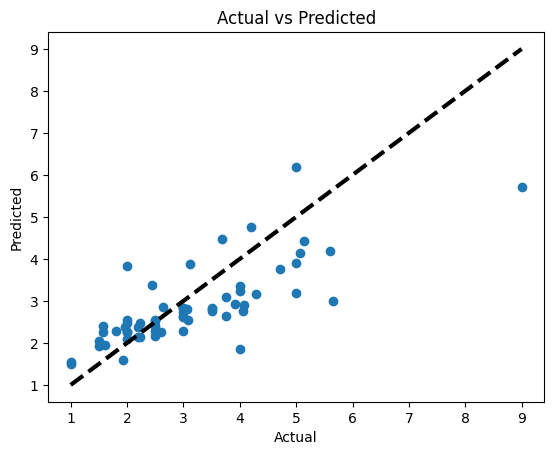

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ypred = model.predict(xtest)

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

import matplotlib.pyplot as plt

plt.scatter(ytest, ypred)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [22]:
import numpy as np

total_bill = float(input("Enter total bill amount: "))
day = int(input("Enter day (0=Thur, 1=Fri, 2=Sat, 3=Sun): "))
sex = int(input("Enter sex (0=Female, 0, 1=Male): "))
time = int(input("Enter time (0=Lunch, 1=Dinner): "))

features = np.array([[total_bill, sex, 0, day, time, 1]])

predicted_tip = model.predict(features)

print("Predicted Tip:", round(predicted_tip[0],2))

Enter total bill amount: 1819
Enter day (0=Thur, 1=Fri, 2=Sat, 3=Sun): 3
Enter sex (0=Female, 0, 1=Male): 1
Enter time (0=Lunch, 1=Dinner): 0
Predicted Tip: 155.31
